# Analyse de données (ACP) avec Python

### Import des librairies

In [151]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

### 1.Importer ce jeu de données avec la librairie pandas

In [154]:
data = pd.read_csv('./villes.csv', sep=';')
X = data.iloc[:, 1:13].values
labels = data.iloc[:, 0].values

### 2.Réaliser une Analyse en Composantes Principales (module PCA de Scikit-learn) sur ce jeu de données centrées réduites (StandardScaler)

a. Quel est le nombre d’axes à retenir pour conserver un minimum de 90% de l’information
représentée dans le nuage initial.

pca.explained_varirance_ : [10.80999558  1.45184229]
pca.explained_varirance_ratio : [0.87268193 0.11720602]
Nombre d'axes à retenir pour minimum 90% de variance : 2


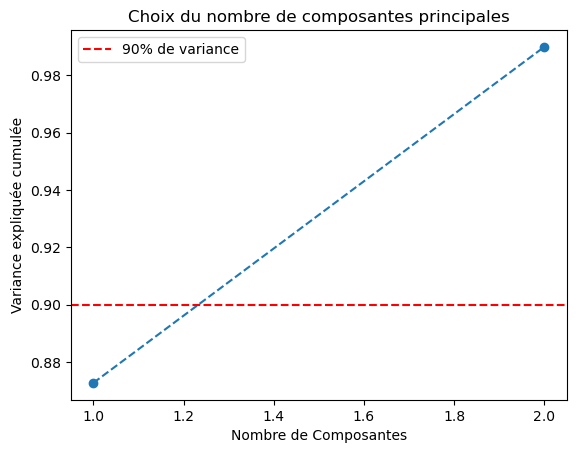

In [158]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Normalisation des données (centrées réduites)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer l'ACP
pca = PCA(0.9)

# pca.fit(X_scaled)

# matrice des données transformées par l’ACP
X_pca = pca.fit_transform(X_scaled)

print(f"pca.explained_varirance_ : {pca.explained_variance_}")
print(f"pca.explained_varirance_ratio : {pca.explained_variance_ratio_}")

# Calculer la variance expliquée cumulée
variance_cumulee = np.cumsum(pca.explained_variance_ratio_)
# Trouver le nombre de composantes pour atteindre 90% de variance
n_components = np.argmax(variance_cumulee >= 0.90) + 1

print(f"Nombre d'axes à retenir pour minimum 90% de variance : {n_components}")

# Tracer la variance expliquée cumulée
plt.plot(range(1, len(variance_cumulee) + 1), variance_cumulee, marker='o', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='--', label="90% de variance")
plt.xlabel("Nombre de Composantes")
plt.ylabel("Variance expliquée cumulée")
plt.title("Choix du nombre de composantes principales")
plt.legend()
plt.show()

b.Donner une interprétation des deux premiers axes principaux

c.En suivant le code ci-dessous, donner une visualisation graphique des villes projetées dans le plan
principal. 

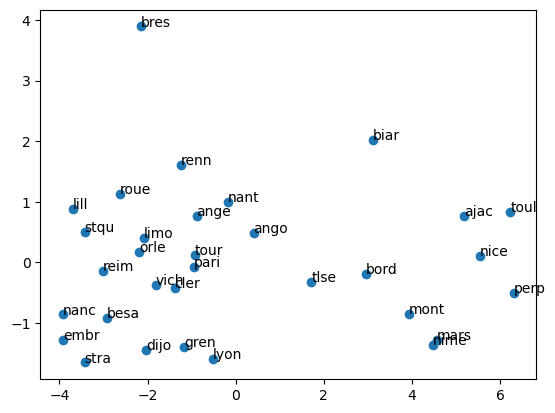

pca.components_ : [[ 0.27151028  0.28846164  0.3010811   0.30354174  0.28353089  0.27841907
   0.27290295  0.28757774  0.30472022  0.3038548   0.29242808  0.2729549 ]
 [ 0.39933494  0.29907184  0.12943051 -0.11530598 -0.32314291 -0.35846763
  -0.38879639 -0.3010133  -0.11231622  0.12249226  0.26269461  0.38693688]]


In [162]:
import matplotlib
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for l, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(l, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()
print(f"pca.components_ : {pca.components_}")

### Interprétation des résultats de l'ACP et du nuage de points :
L'analyse en composantes principales (PCA) permet de réduire la dimensionnalité des données tout en conservant un maximum d'information. Voici une interprétation du nuage de points en fonction des axes donnés :
##### Axe X (Variation des moyennes de température)
Les points situés à gauche correspondent probablement aux villes ayant des températures moyennes plus faibles. Cela pourrait inclure des villes du nord de la France ou des régions à climat plus frais.
Les points situés à droite représentent des villes où la température moyenne est plus élevée, ce qui correspondrait aux villes du sud comme Nice, Perpignan, Marseille, etc.
##### Axe Y (Saisons Été-Hiver)
Les points en bas du graphique semblent représenter les villes où l’écart entre l’été et l’hiver est important, suggérant un climat plus contrasté (exemple : des villes avec des hivers froids et des étés chauds).
Les points en haut sont probablement des villes où la variation saisonnière est plus faible, ce qui pourrait être des zones où les températures restent relativement stables au fil des saisons (exemple : Brest).
##### Interprétation globale
Les villes du sud comme Nice, Perpignan, Marseille, Toulouse, Montpellier sont situées à droite, confirmant qu’elles ont des températures moyennes plus élevées.
Les villes comme Brest, Rennes, Rouen, Nancy sont plus à gauche, ce qui correspond à des climats plus tempérés et plus froids en moyenne.
Brest est en haut du graphique, ce qui pourrait suggérer une stabilité thermique relative, tandis que Lyon, Dijon et Grenoble sont en bas,  indiquant un climat avec des variations saisonnières marquées.
En résumé, le PCA semble bien distinguer les villes selon leur climat, avec un axe X reflétant la température moyenne et un axe Y indiquant l’amplitude des variations saisonnières.

In [165]:
def analyse_acp_fichier(fichier_csv):
    """
    Effectue l'ACP sur un fichier CSV, répond aux questions analytiques et affiche les résultats.
    
    Paramètres :
    - fichier_csv : Chemin du fichier CSV à analyser.
    - labels_column : Nom de la colonne contenant les noms des villes (ou autres labels).
    - delimiter : Délimiteur utilisé dans le fichier CSV ("," par défaut, ";" pour certains fichiers).
    
    Retourne :
    - X_pca : Matrice des données transformées après ACP.
    - pca : Objet PCA de sklearn contenant les informations sur les composantes principales.
    """
    
    # Charger les données
    print(f"Chargement du fichier : {fichier_csv}")
    data = pd.read_csv(fichier_csv, delimiter=";")
    labels = data.iloc[:, 0].values
    X = data.iloc[:, 1:13].values
    print("fichier chargé")

    # Normalisation des données (centrées réduites)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Appliquer l'ACP
    pca = PCA(0.9)
    
    # pca.fit(X_scaled)
    
    # matrice des données transformées par l’ACP
    X_pca = pca.fit_transform(X_scaled)
    
    print(f"pca.explained_variance_ : {pca.explained_variance_}")
    print(f"pca.explained_varirance_ratio_ : {pca.explained_variance_ratio_}")
    print(f"pca.components_ : {pca.components_}")
    # Calculer la variance expliquée cumulée
    variance_cumulee = np.cumsum(pca.explained_variance_ratio_)
    # Trouver le nombre de composantes pour atteindre 90% de variance
    n_components = np.argmax(variance_cumulee >= 0.90) + 1
    
    print(f"Nombre d'axes à retenir pour minimum 90% de variance : {n_components}")
    
    # Tracer la variance expliquée cumulée
    plt.plot(range(1, len(variance_cumulee) + 1), variance_cumulee, marker='o', linestyle='--')
    plt.axhline(y=0.90, color='r', linestyle='--', label="90% de variance")
    plt.xlabel("Nombre de Composantes")
    plt.ylabel("Variance expliquée cumulée")
    plt.title("Choix du nombre de composantes principales")
    plt.legend()
    plt.show()
    
    plt.scatter(X_pca[:, 0], X_pca[:, 1])
    for l, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
     plt.annotate(l, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
    plt.show()
    return

Chargement du fichier : ./crimes.csv
fichier chargé
pca.explained_variance_ : [4.19893828 1.26400187 0.74062921 0.32288984]
pca.explained_varirance_ratio_ : [0.58785136 0.17696026 0.10368809 0.04520458]
pca.components_ : [[ 0.30027916  0.43175936  0.39687549  0.3966517   0.44015721  0.35735953
   0.29517681]
 [ 0.62917444  0.16943512 -0.04224698  0.34352815 -0.20334059 -0.40231912
  -0.50242093]
 [ 0.1782453  -0.24419758  0.49586087 -0.06950972 -0.20989509 -0.53923144
   0.56838373]
 [-0.23211411  0.06221567 -0.55798926  0.62980445 -0.05755491 -0.23488987
   0.41923832]]
Nombre d'axes à retenir pour minimum 90% de variance : 4


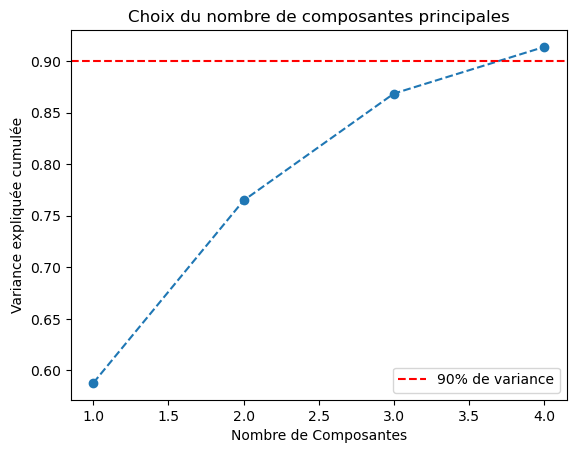

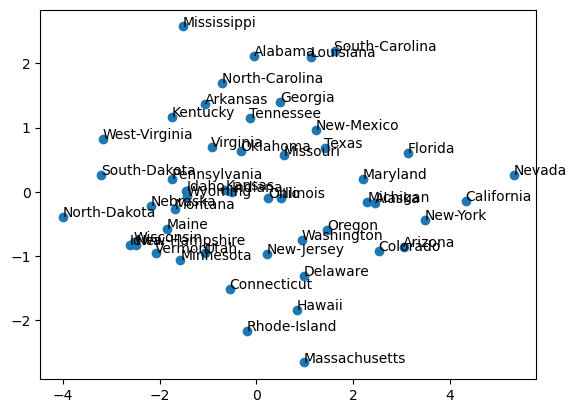

In [167]:
name = "./crimes.csv"
analyse_acp_fichier(name)


### Interpretation
1. Comprendre les axes principaux
L’analyse en composantes principales (PCA) extrait les directions qui capturent le mieux la variance des données.
Première composante principale (PC1) : Elle explique 58.8% de la variance et est fortement corrélée avec tous les types de crimes (coefficients positifs dans pca.components_). Cela signifie qu’elle distingue les États avec une criminalité globale élevée de ceux avec une criminalité plus faible.
Deuxième composante principale (PC2) : Elle explique 17.7% de la variance et est dominée par Meurtre (0.629) et Attaque (0.343), tandis que les autres crimes ont des coefficients plus faibles voire négatifs (Vols de voiture -0.502, Larcins -0.402). Cela suggère qu’elle distingue les États où les crimes violents (meurtres et agressions) sont plus fréquents des États où les délits non violents (vols, larcins) sont plus courants.

2. Interprétation du Nuage de Points

- Axe X (PC1 - Globalité de la criminalité)

À droite : États avec taux global de criminalité plus élevé (ex. Nevada, Californie, Floride).

À gauche : États avec faible criminalité (ex. North Dakota, Maine).

- Axe Y (PC2 - Crimes violents vs. délits mineurs)

En haut : États avec forte prévalence de crimes violents (ex. Mississippi, Alabama, Louisiane).

En bas : États avec plus de délits mineurs et peu de crimes violents (ex. Massachusetts, Rhode Island, Connecticut).

3. Comparaison des États

Mississippi, Alabama, Louisiane → Haut et à droite : États avec taux global élevé et forte criminalité violente.
Nevada, Californie, Floride → Droite et plus bas : Criminalité élevée mais plus de délits mineurs que de meurtres/agressions.
Dakota du Nord, Maine, Vermont → Bas et à gauche : États avec faible criminalité, surtout peu de crimes violents.
Massachusetts, Rhode Island, Connecticut → En bas : Criminalité plus faible et dominée par des délits mineurs.
Conclusion
Le PCA a bien séparé les États selon :
Leur niveau général de criminalité (PC1).
Le type dominant de crimes (PC2 : crimes violents vs. délits mineurs).

Chargement du fichier : 50_startups.csv
fichier chargé
pca.explained_variance_ : [2.7267099  1.04019163]
pca.explained_varirance_ratio_ : [0.66804393 0.25484695]
pca.components_ : [[ 0.59347855  0.14737886  0.52064694  0.59580992]
 [ 0.04048087  0.95051314 -0.30797098 -0.00632069]]
Nombre d'axes à retenir pour minimum 90% de variance : 2


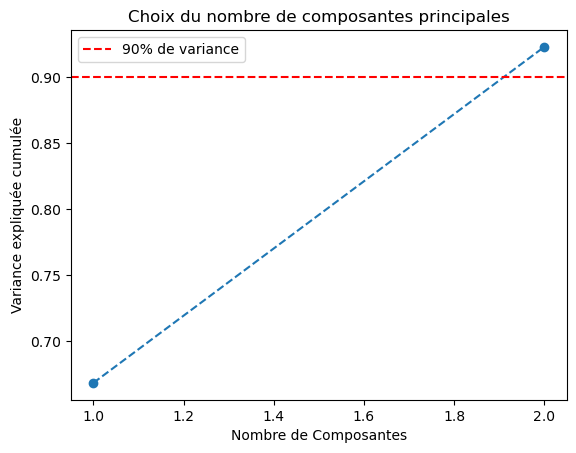

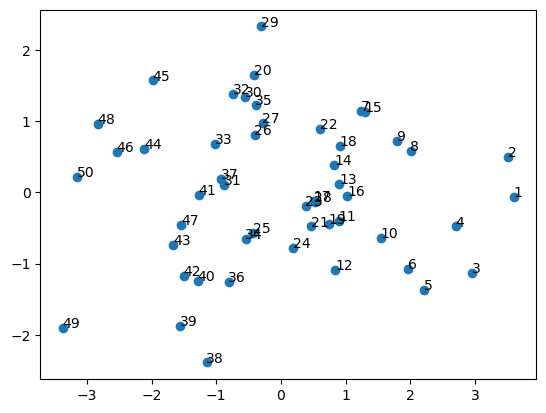

In [169]:
analyse_acp_fichier('50_startups.csv')

### Interpretation

1. Détermination des Axes Principaux
L’ACP permet de projeter les 4 variables originales (R&D, Administration, Marketing, Bénéfice) sur deux axes principaux.
Première composante principale (PC1 - Axe X) :
Explique 66.8% de la variance (dominante).
Fortement corrélée avec R&D (0.59), Marketing (0.52) et Bénéfice (0.59).
Interprétation : Cet axe représente la performance économique globale des startups (investissements en R&D et Marketing liés aux profits).
Deuxième composante principale (PC2 - Axe Y) :
Explique 25.5% de la variance.
Fortement corrélée avec Administration (0.95) et faiblement avec les autres variables.
Interprétation : Cet axe distingue les startups selon leur niveau de dépenses administratives, indépendamment de leur performance économique.

2. Analyse du Nuage de Points
 
À droite (PC1 élevé) → Startups à forte rentabilité, avec des investissements élevés en R&D et Marketing.

À gauche (PC1 faible) → Startups avec moins d’investissement et de rentabilité.

En haut (PC2 élevé) → Startups avec des coûts administratifs élevés.

En bas (PC2 faible) → Startups avec des coûts administratifs faibles.

3. Comparaison des Startups
Quadrant en haut à droite → Startups rentables avec des dépenses administratives élevées.

Quadrant en bas à droite → Startups rentables mais avec des coûts administratifs faibles (meilleure efficacité ?).

Quadrant en haut à gauche → Startups moins rentables avec des coûts administratifs élevés (moins efficaces).

Quadrant en bas à gauche → Startups avec peu d’investissement et de rentabilité, mais aussi peu de coûts administratifs.

##### Conclusion
L’ACP montre que la rentabilité des startups est principalement liée aux investissements en R&D et Marketing, tandis que les coûts administratifs influencent une autre dimension. Les startups les plus performantes sont situées à droite, et les plus inefficaces en haut à gauche.